In [98]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import scipy.stats 
import math
from scipy.stats import t
from scipy.stats import chisquare
import scipy
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy.stats.contingency import expected_freq
import statsmodels.stats

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mat

In [ ]:
df = pd.read_csv('case_study.csv')

In [ ]:
df

In [ ]:
df.MENTHLTH

In [ ]:
change_these = {77: np.nan, 88: 0, 99: np.nan}

df['menthlth'] = df['MENTHLTH'].replace(change_these)

# df.menthlth.value_counts().sort_index() ***check numbers to make sure they're right

the_mean = df.menthlth.mean()
the_stdev = df.menthlth.std()
the_len = df.menthlth.size
low_bound = the_mean + the_stdev*norm.ppf(.025)/math.sqrt(the_len)
up_bound = the_mean + the_stdev*norm.ppf(.975)/math.sqrt(the_len)
# print(f'Average number of days people felt their mental health was not good: {the_mean:.4f}')
# print(f'95% confidence interval: ({low_bound:.4f}, {up_bound:.4f})')


In [ ]:
df._RFBMI5

value_change = {1:0, 2:1, 9:np.nan}

In [ ]:
df._RFBMI5 = df._RFBMI5.replace(value_change)

In [ ]:
df['menthlth']

In [ ]:
df._RFBMI5

In [ ]:
mentalsick_mean = df['menthlth'].mean()
mentalsick_std = df['menthlth'].std()
sample_size = df['menthlth'].count()




In [102]:
#Create a confidence interval for a sample mean.


low_bound = mentalsick_mean + mentalsick_std*norm.ppf(.025)/math.sqrt(sample_size)
upper_bound = mentalsick_mean + mentalsick_std*norm.ppf(.975)/math.sqrt(sample_size)
low_bound , upper_bound

(3.3814308194817686, 3.546575789747548)

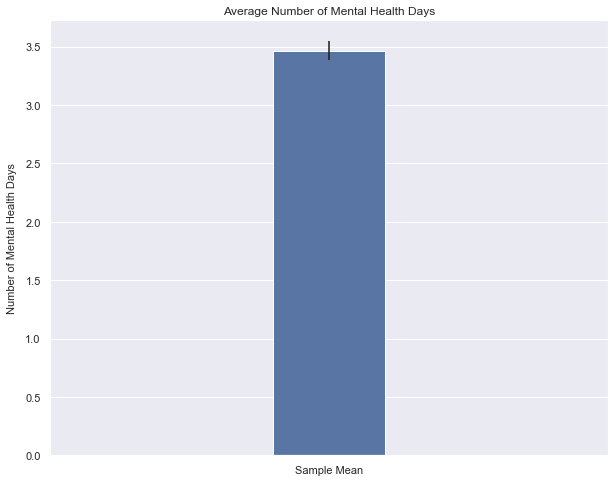

In [62]:
the_bar = sns.barplot(x=['Sample Mean'], y=mentalsick_mean, yerr = mentalsick_std*norm.ppf(.025)/math.sqrt(sample_size))

columncounts = [20]

def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths
widthbars = normaliseCounts(columncounts,100)

# Loop over the bars, and adjust the width (and position, to keep the bar centred)
for bar,newwidth in zip(the_bar.patches,widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2

    bar.set_x(centre-newwidth/2)
    bar.set_width(newwidth)

the_bar.axes.set_title('Average Number of Mental Health Days')
the_bar.set_ylabel('Number of Mental Health Days', labelpad = 8, fontsize = 11)
plt.show()

In [63]:
#Create a confidence interval for a sample proportion

#calculate total number of successes. people who had a mental sick day over total sample size
total_successess = len(df.loc[df['menthlth'] >= 1])

lower, upper = statsmodels.stats.proportion.proportion_confint(count=total_successess, nobs=sample_size)
lower, upper

(0.2926367638861731, 0.3023709075407123)

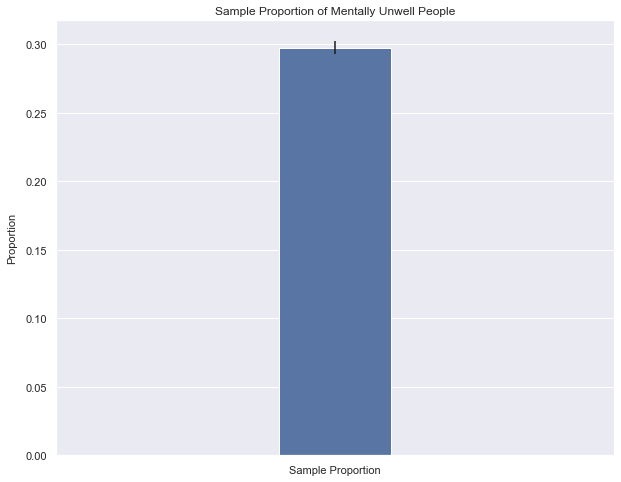

In [103]:
the_bar2 = sns.barplot(x=['Sample Proportion'], y=(lower+upper)/2, yerr = upper-(lower+upper)/2)

columncounts = [20]

def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths
widthbars = normaliseCounts(columncounts,100)

# Loop over the bars, and adjust the width (and position, to keep the bar centred)
for bar,newwidth in zip(the_bar2.patches,widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2

    bar.set_x(centre-newwidth/2)
    bar.set_width(newwidth)

the_bar2.axes.set_title('Sample Proportion of Mentally Unwell People')
the_bar2.set_ylabel('Proportion', labelpad = 8, fontsize = 11)
plt.show()

In [15]:
#Perform a two-sample test of means.

#H0: average non-overweight mentally sick people = average overweight mentally sick people
#Ha: sample means are not equal

mean_sick_nonow = df.loc[df['_RFBMI5'] == 0]['menthlth'].mean()
mean_sick_ow = df.loc[df['_RFBMI5'] == 1]['menthlth'].mean()
sick_nonow = df.loc[df['_RFBMI5'] == 0]['menthlth']
sick_ow = df.loc[df['_RFBMI5'] == 1]['menthlth']

In [16]:
scipy.stats.ttest_ind(sick_nonow, sick_ow, nan_policy= 'omit')

Ttest_indResult(statistic=-2.057988121995879, pvalue=0.03959973958289035)

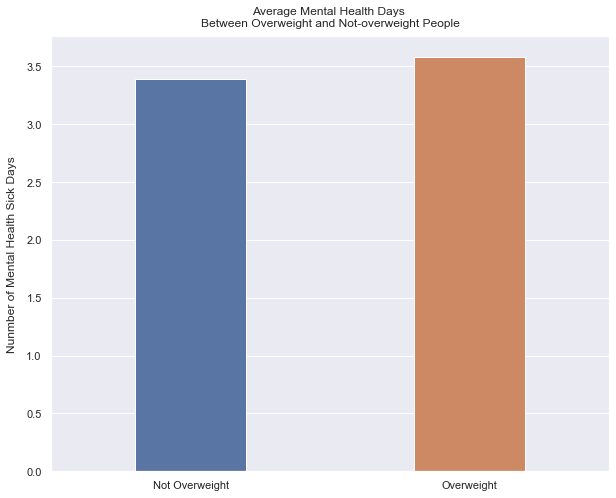

In [104]:
the_bar3 = sns.barplot(x=['Not Overweight', 'Overweight'], y=[mean_sick_nonow, mean_sick_ow])
the_bar3.axes.set_title('Average Mental Health Days \nBetween Overweight and Not-overweight People', pad = 10)
the_bar3.set_ylabel('Nunmber of Mental Health Sick Days', labelpad = 9)
columncounts = [40, 40]

def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths
widthbars = normaliseCounts(columncounts,100)

# Loop over the bars, and adjust the width (and position, to keep the bar centred)
for bar,newwidth in zip(the_bar3.patches,widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2

    bar.set_x(centre-newwidth/2)
    bar.set_width(newwidth)

# we can reject the null hypothesis

In [19]:
#Perform a two sample test of proportions.

#H0: proportion of mentally sick and normal weight == proportion of  mentally sick people and overweight
#Ha: proportions are not equal


In [20]:
not_ow_success = len(df['_RFBMI5'][(df['menthlth'] >= 1) & (df['_RFBMI5'] == 0)])
ow_success = len(df['_RFBMI5'][(df['menthlth'] >= 1) & (df['_RFBMI5'] == 1)])
not_ow_len = (df['_RFBMI5'] == 0).sum()
ow_len = (df['_RFBMI5'] == 1).sum()

statsmodels.stats.proportion.proportions_ztest([not_ow_success, ow_success], [not_ow_len, ow_len], value = 0)



(2.734547865455442, 0.006246601262283397)

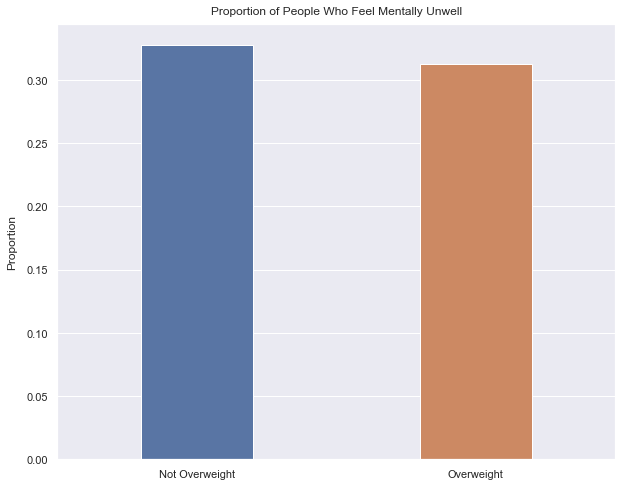

In [105]:
the_bar4 = sns.barplot(x=['Not Overweight', 'Overweight'], y=[not_ow_success/not_ow_len, ow_success/ow_len])
the_bar4.axes.set_title('Proportion of People Who Feel Mentally Unwell', pad = 10)
the_bar4.set_ylabel('Proportion', labelpad = 9)
columncounts = [40, 40]

def normaliseCounts(widths,maxwidth):
    widths = np.array(widths)/float(maxwidth)
    return widths
widthbars = normaliseCounts(columncounts,100)

# Loop over the bars, and adjust the width (and position, to keep the bar centred)
for bar,newwidth in zip(the_bar4.patches,widthbars):
    x = bar.get_x()
    width = bar.get_width()
    centre = x+width/2

    bar.set_x(centre-newwidth/2)
    bar.set_width(newwidth)

In [22]:
#We can conclude that the null hypothesis is false

In [23]:
#Perform a Chi-Square test
#H0: weight and age group has no relationship Ha: weight and age group variables are related to each other

#dependant variable is whether or not a person is overweight or not

total_normal_weight = len(df.loc[df['_RFBMI5'] == 0])
total_overweight = len(df.loc[df['_RFBMI5'] == 1])

In [24]:
#independent variable is age group

total_age_sample = len(df._AGE80)

In [25]:
#create new column broken into 4 age groups. 1=millenial, 2=genx, 3=babyboomer, 4=trad

millenial = list(range(18,35))
genx = list(range(35,50))
baby_boomer = list(range(50,65))
trad = list(range(65,81))

df['age_group'] = df['_AGE80'].apply(lambda x: 1 if x in range(18,35) else (2 if x in range(35,50) else 
                                                          (3 if x in range(50,65) else 4)))

In [81]:
age_weight_table = pd.crosstab(columns=df['age_group'],index=df._RFBMI5)

In [82]:
age_weight_table

age_group,1,2,3,4
_RFBMI5,,,,
0.0,2205,1921,3127,3689
1.0,2232,3760,7076,7058


In [106]:
scipy.stats.chi2_contingency(age_weight_table)

(509.68467009154415,
 3.800323546410405e-110,
 3,
 array([[1562.69003476, 2000.8208446 , 3593.44747007, 3785.04165057],
        [2874.30996524, 3680.1791554 , 6609.55252993, 6961.95834943]]))

In [ ]:
df['age_group']

In [ ]:
print(age_weight_table.columns, age_weight_table.index)

# newtable = pd.melt(age_weight_table, id_vars='age_group', var_name = '_RFBMI5', value_name = 'Count')
# newtable

newtable2 = pd.DataFrame(np.array(['']))

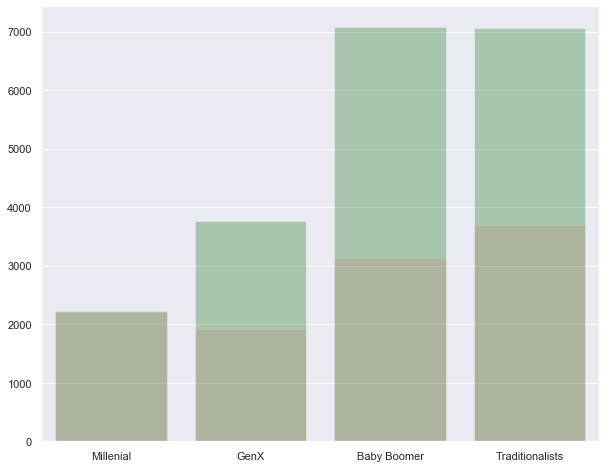

In [107]:
sns.barplot(x=['Millenial','GenX','Baby Boomer','Traditionalists'], 
                                y=[age_weight_table[1][1],
                                  age_weight_table[2][1],
                                  age_weight_table[3][1],
                                  age_weight_table[4][1]], color='green', alpha=.3)

sns.barplot(x=['Millenial','GenX','Baby Boomer','Traditionalists'], 
                                y=[age_weight_table[1][0],
                                  age_weight_table[2][0],
                                  age_weight_table[3][0],
                                  age_weight_table[4][0]], color='red', alpha=.1)





In [ ]:
#we can reject our null hypothesis becuase our Pvalue falls within 5% significance

In [ ]:
#Perform a one-way ANOVA

#H0: all age groups are equal Ha: all age groups are not equal




In [ ]:
df.loc[(df.WTKG3 == 777) | (df.WTKG3 == 999)]

In [30]:
df['WTKG3'].dropna(inplace=True)

In [31]:
df['WTKG3']

0        7257.0
1        9299.0
3        7484.0
4        7439.0
5        4672.0
          ...  
34540    7711.0
34541    5897.0
34542    9752.0
34543    6260.0
34544    8845.0
Name: WTKG3, Length: 31831, dtype: float64

In [40]:
df.dropna(subset=['WTKG3'], inplace=True)

In [42]:
scipy.stats.f_oneway(df['WTKG3'][df['age_group'] == 1],
                    df['WTKG3'][df['age_group'] == 2],
                    df['WTKG3'][df['age_group'] == 3],
                    df['WTKG3'][df['age_group'] == 4], )

F_onewayResult(statistic=159.173927456947, pvalue=2.0738252957997844e-102)

In [ ]:
#null hythosis is true

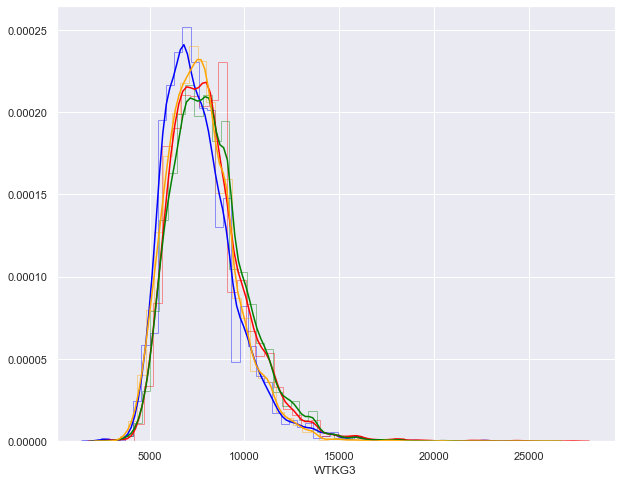

In [108]:
mill_weight_array = df[df['age_group']==1]['WTKG3']
genx_weight_array = df[df['age_group']==2]['WTKG3']
babyboomer_weight_array = df[df['age_group']==3]['WTKG3']
trad_weight_array = df[df['age_group']==4]['WTKG3']


sns.set(rc = {'figure.figsize': (10,8)})
sns.distplot(mill_weight_array, hist_kws = {'histtype':'step'}, color='blue', )
sns.distplot(genx_weight_array, hist_kws = {'histtype':'step'}, color='red')
sns.distplot(babyboomer_weight_array, hist_kws = {'histtype':'step'}, color='green')
sns.distplot(trad_weight_array, hist_kws = {'histtype':'step'}, color='orange')

#step